In [1]:
import numpy
import matplotlib.pyplot as plt
import matplotlib
from pylab import figure, text, scatter, show
import sys, math, numpy, pandas
%matplotlib inline

import seaborn as sns
sns.set_theme()

def get_chelpg(sysname, pathname):
    '''Get psf and cor.'''
    if   sysname == 'toho_amp' and pathname == 'r1ae':
        fwdir = '../../1.sampling/0.toho_amp.r1/9.paths.sp/2.reactant_chelpg/chelpg.npy'
        bwdir = '../../1.sampling/2.toho_amp.ae/9a.r1.paths.sp/2.reactant_chelpg/chelpg.npy'
        fwlbldir = '../../1.sampling/0.toho_amp.r1/9.paths.sp/2.reactant_chelpg/chelpg_labels.npy'
        bwlbldir = '../../1.sampling/2.toho_amp.ae/9a.r1.paths.sp/2.reactant_chelpg/chelpg_labels.npy'
    elif sysname == 'toho_amp' and pathname == 'r2ae':
        fwdir = '../../1.sampling/1.toho_amp.r2/9.paths.sp/2.reactant_chelpg/chelpg.npy'
        bwdir = '../../1.sampling/2.toho_amp.ae/9b.r2.paths.sp/2.reactant_chelpg/chelpg.npy'
        fwlbldir = '../../1.sampling/1.toho_amp.r2/9.paths.sp/2.reactant_chelpg/chelpg_labels.npy'
        bwlbldir = '../../1.sampling/2.toho_amp.ae/9b.r2.paths.sp/2.reactant_chelpg/chelpg_labels.npy'
    elif sysname == 'toho_cex' and pathname == 'r1ae':
        fwdir = '../../1.sampling/3.toho_cex.r1/9.paths.sp/2.reactant_chelpg/chelpg.npy'
        bwdir = '../../1.sampling/5.toho_cex.ae/9a.r1.paths.sp/2.reactant_chelpg/chelpg.npy'
        fwlbldir = '../../1.sampling/3.toho_cex.r1/9.paths.sp/2.reactant_chelpg/chelpg_labels.npy'
        bwlbldir = '../../1.sampling/5.toho_cex.ae/9a.r1.paths.sp/2.reactant_chelpg/chelpg_labels.npy'
    elif sysname == 'toho_cex' and pathname == 'r2ae':
        fwdir = '../../1.sampling/4.toho_cex.r2/9.paths.sp/2.reactant_chelpg/chelpg.npy'
        bwdir = '../../1.sampling/5.toho_cex.ae/9b.r2.paths.sp/2.reactant_chelpg/chelpg.npy'
        fwlbldir = '../../1.sampling/4.toho_cex.r2/9.paths.sp/2.reactant_chelpg/chelpg_labels.npy'
        bwlbldir = '../../1.sampling/5.toho_cex.ae/9b.r2.paths.sp/2.reactant_chelpg/chelpg_labels.npy'
    
    fw_chelpg = numpy.load(fwdir)
    bw_chelpg = numpy.load(bwdir)
    fw_lbl = numpy.load(fwlbldir)
    bw_lbl = numpy.load(bwlbldir)
    if numpy.array_equal(fw_lbl, bw_lbl):
        return numpy.concatenate( (fw_chelpg, bw_chelpg), axis = 0 ), fw_lbl
    

['SER.69.OG' 'AMP.285.C7' 'AMP.285.N4' 'TIP3.433.OH2' 'GLU.165.OE1'
 'LYS.72.NZ' 'SER.129.OG']
['SER.69.OG' 'CEX.285.C8' 'CEX.285.N5' 'TIP3.433.OH2' 'GLU.165.OE1'
 'LYS.72.NZ' 'SER.129.OG']


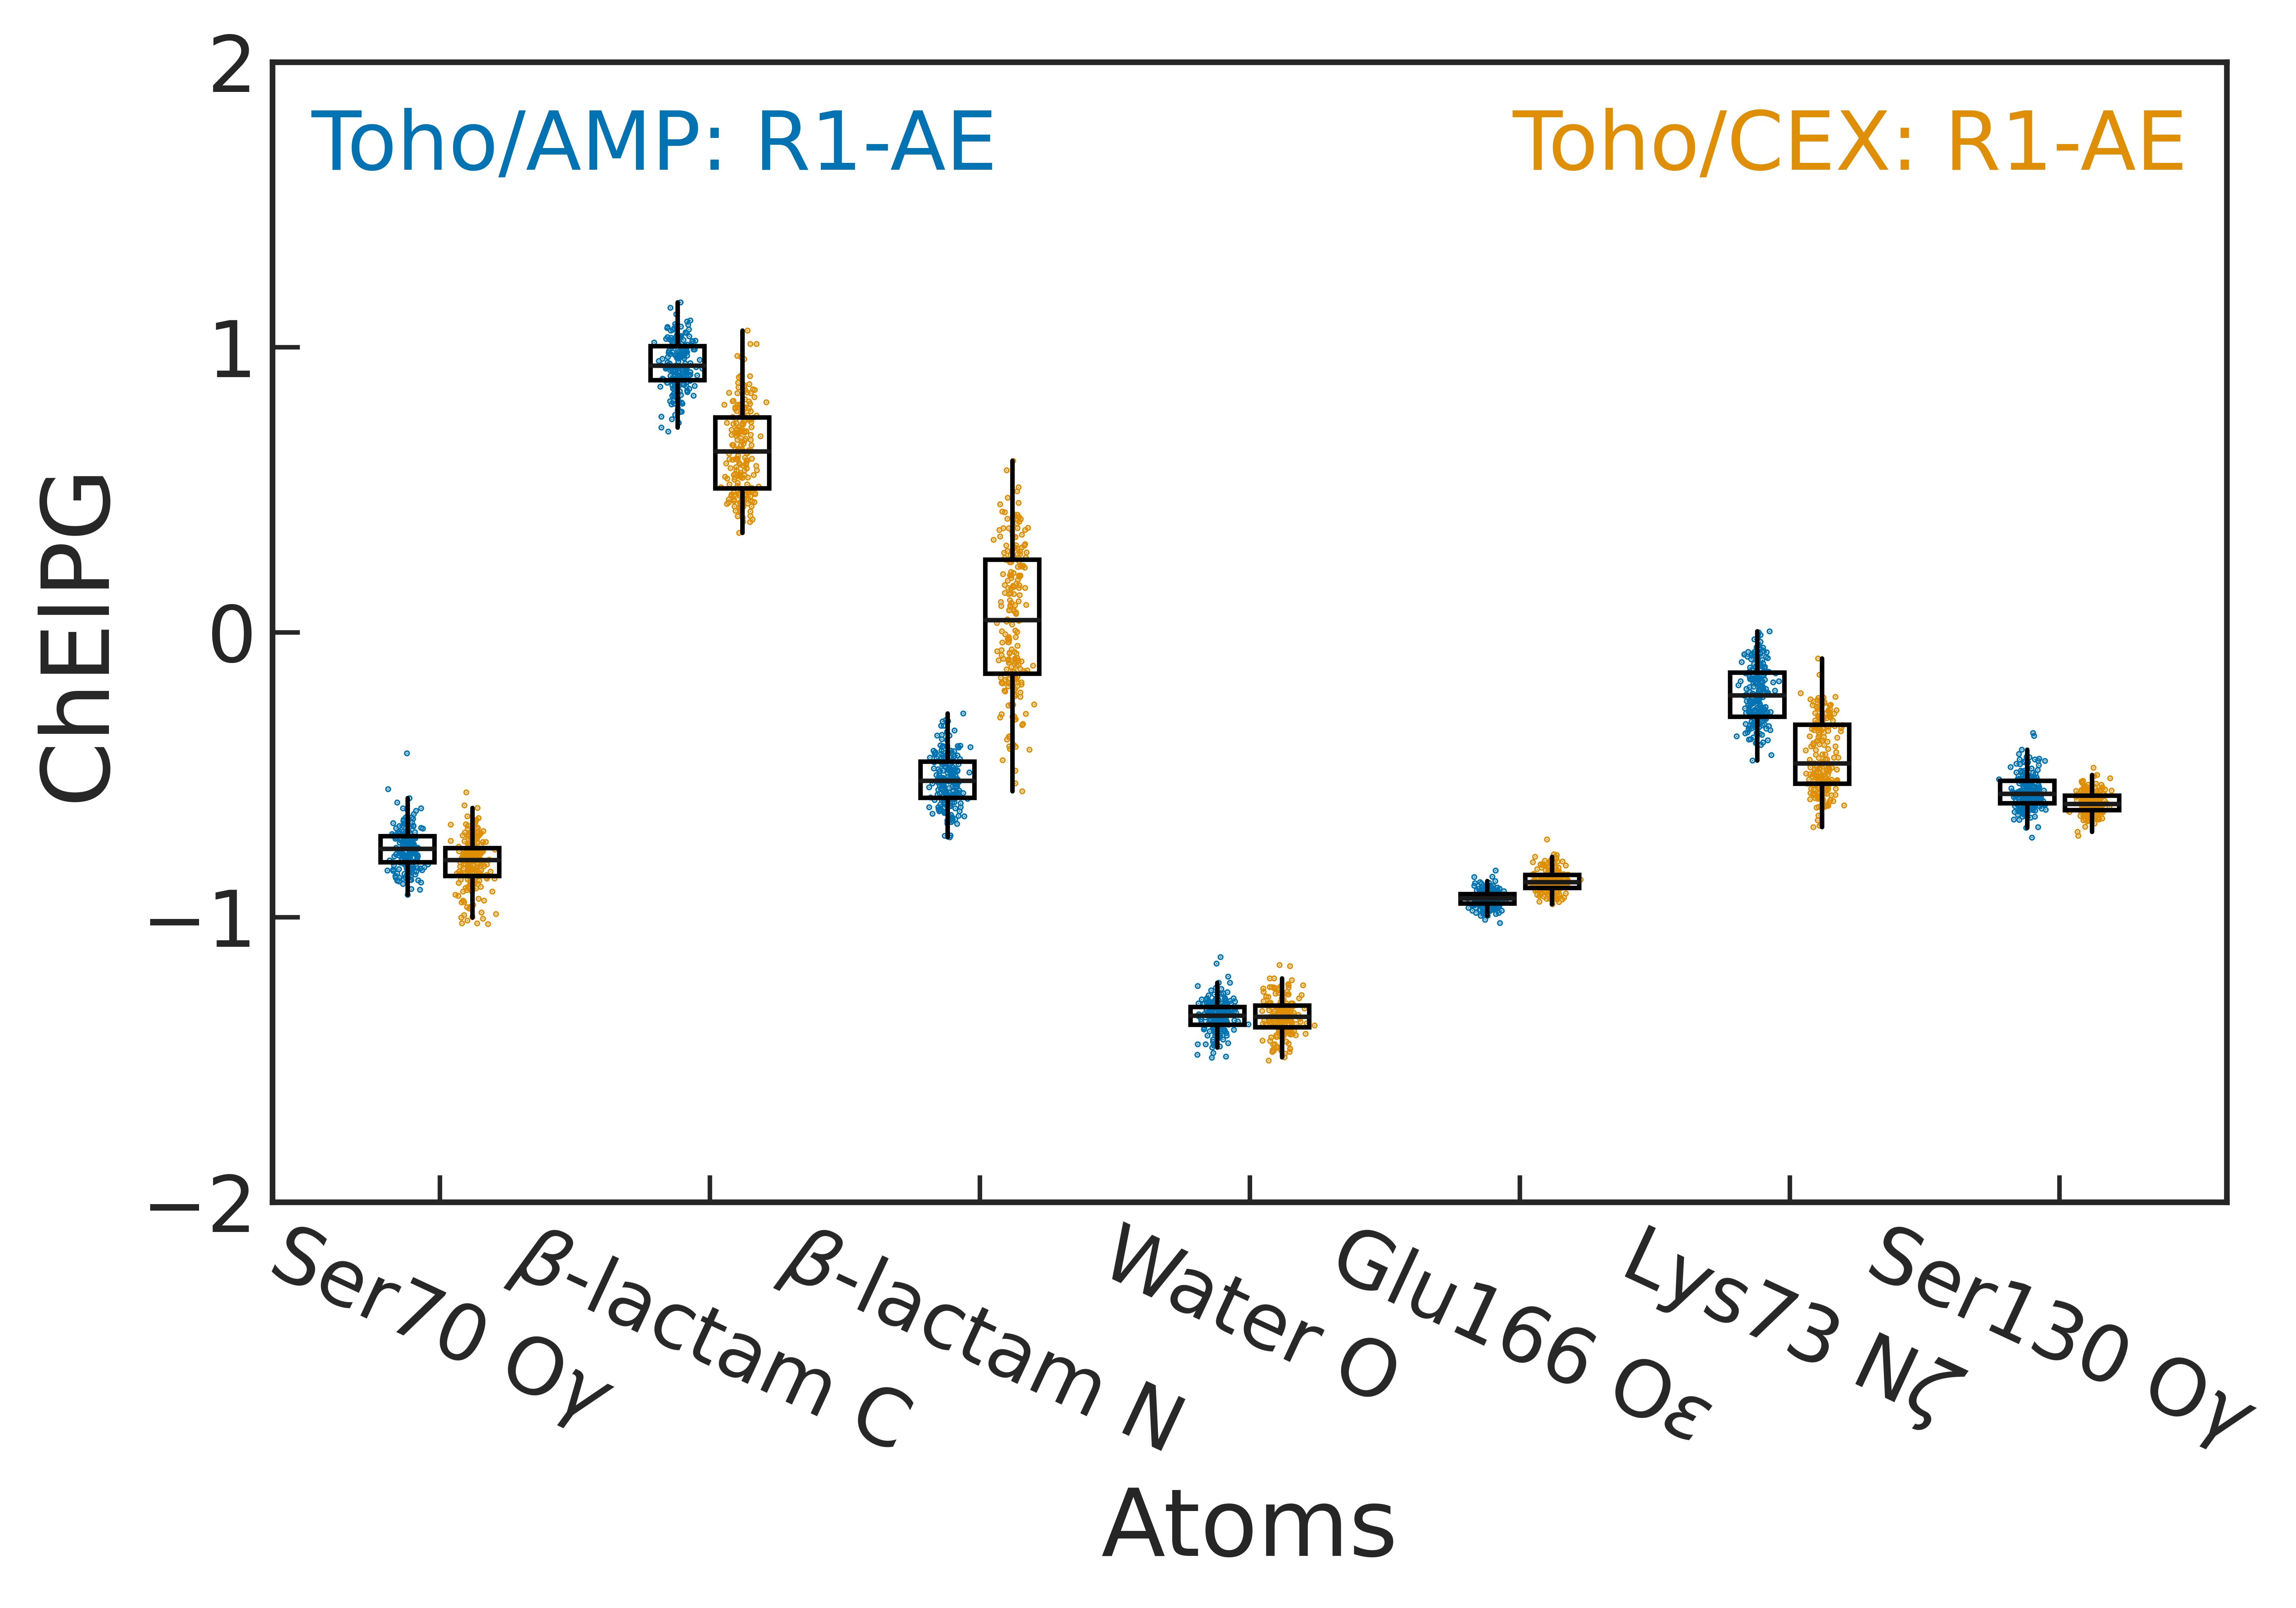

In [6]:
pathname = 'r1ae'
amp_sel = [3, 81, 82, 122, 37, 19, 26] if pathname == 'r1ae' else [3, 81, 82, 19, 26]
cex_sel = [3, 91, 86, 120, 37, 19, 26] if pathname == 'r1ae' else [3, 91, 86, 19, 26]
amp_chrg, lbl = get_chelpg('toho_amp', pathname)
print(lbl[amp_sel])
cex_chrg, lbl = get_chelpg('toho_cex', pathname)
print(lbl[cex_sel])

xticks = [r'Ser70 O$\gamma$', r'$\beta$-lactam C', r'$\beta$-lactam N',                                    r'Lys73 N$\zeta$', r'Ser130 O$\gamma$'] if pathname == 'r2ae' else \
         [r'Ser70 O$\gamma$', r'$\beta$-lactam C', r'$\beta$-lactam N', r'Water O', r'Glu166 O$\epsilon$', r'Lys73 N$\zeta$', r'Ser130 O$\gamma$',]

# init figure ==================================================================
sns.set_style(style='white')
sns.set_style("ticks")
fig, ax,  = plt.subplots(figsize=(8, 5.5), dpi=900, facecolor='w', edgecolor='k', )
plt.subplots_adjust(left=1.5/8, right=7.5/8, top=5/5.5, bottom=1.5/5.5)
ax.tick_params(which='major', direction='in', length=6, width=1, labelsize='x-large', )

#ax.set_xlim(0, 100)
ax.set_ylim(-2, 2)
#plt.yticks([5*y for y in range(5)])
ax.text(0.02, 0.96,'Toho/AMP: '+pathname[:2].upper()+'-'+pathname[2:].upper(),
        ha='left', va='top', transform=ax.transAxes, fontsize=18, color=sns.color_palette('colorblind')[0])
ax.text(0.98, 0.96,'Toho/CEX: '+pathname[:2].upper()+'-'+pathname[2:].upper(),
        ha='right', va='top', transform=ax.transAxes, fontsize=18, color=sns.color_palette('colorblind')[1])

ax.set_ylabel(r'ChElPG', fontsize='xx-large', )
ax.set_xlabel(r'Atoms', fontsize='xx-large', )
ax.tick_params(labelsize='x-large')

x = numpy.arange(len(amp_sel))
amp_y = amp_chrg[:, amp_sel]
cex_y = cex_chrg[:, cex_sel]

amp_boxes = ax.boxplot(x=amp_y, positions=x-0.12, widths=0.2, showcaps=False, showfliers=False, medianprops=dict(color='k'), patch_artist=True) 
cex_boxes = ax.boxplot(x=cex_y, positions=x+0.12, widths=0.2, showcaps=False, showfliers=False, medianprops=dict(color='k'), patch_artist=True) 

for i in range(amp_y.shape[1]):
    ax.scatter(x=numpy.random.normal(loc=x[i]-0.12, scale=0.03, size=200),
           y=amp_y[:, i], s=0.1, color=sns.color_palette('colorblind')[0])
for i in range(cex_y.shape[1]):
    ax.scatter(x=numpy.random.normal(loc=x[i]+0.12, scale=0.03, size=200),
           y=cex_y[:, i], s=0.1, color=sns.color_palette('colorblind')[1])

plt.setp(amp_boxes["boxes"], facecolor='#00000000')
plt.setp(cex_boxes["boxes"], facecolor='#00000000')
        

plt.xticks(numpy.arange(len(amp_sel)), rotation=335)
ax.set_xticklabels(xticks)

        
fig.savefig('both_{0}.chelpg.png'.format(pathname, ))
plt.show()